In [20]:
from src.preprocess.text import TextDataProcessor, Corpus
from src.models.lsa import LSAModel
import pandas as pd
import re


from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [35]:
# %%
df_text = pd.read_csv(
    "/Users/Mikhail_Bulgakov/GitRepo/topic-modeling/data/clean_text_title_preprocessed_lemma_.csv"
)


In [36]:
df_text.head(2)

,Unnamed: 0,clean_text_title_array_norm
0,41971,открытый урок асинхронный программирование jav...
1,32826,ученый готовить фундаментальный обновление еди...


drop non-russian words

In [37]:
extra_stop_words= [
        "который",
        "такой",
        "один",
        "первый",
        "иметь",
        "часть",
        "являться",
        "один",
        "два",
        "также",
        "несколько",
        "большой",
        "данный",
        "новый",
        "это",
        "мочь",
        "нужно",
        "наш",
        "просто",
        "быть",
        "мы",
        "например",
        "свой",
        "очень",
        "все",
        "самый",
        "новый",
        "другой",
        "тот",
        "каждый"
    ]

In [38]:
def is_latin_character_in_word(word):
    return len(re.findall(r"[\x00-\x7f]", word)) > 0

def is_non_latin_character_in_word(word):
    return len(re.findall(r"[^\x00-\x7f]", word)) > 0

def is_mixed_characters_in_word(word):
    return (len(re.findall(r"[^\x00-\x7f]", word)) > 0) and (len(re.findall(r"[\x00-\x7f]", word)) > 0)

def leave_russian(string):
    return [word for word in string.split(" ") if (not is_latin_character_in_word(word) and not is_mixed_characters_in_word(word) and len(word) > 1 and not word in extra_stop_words)]

def leave_non_russian(string):
    return [word for word in string.split(" ") if (is_latin_character_in_word(word) and not is_mixed_characters_in_word(word) and len(word) > 1)]

In [39]:
df_text["only_rus"] = df_text["clean_text_title_array_norm"].apply(leave_russian)
# df_text["without_rus"] = df_text["clean_text_title_array_norm"].apply(leave_non_russian)

In [40]:
df_text

,Unnamed: 0,clean_text_title_array_norm,only_rus
0,41971,открытый урок асинхронный программирование jav...,"[открытый, урок, асинхронный, программирование..."
1,32826,ученый готовить фундаментальный обновление еди...,"[ученый, готовить, фундаментальный, обновление..."
2,33122,qameetup superjob июнь проводить qameetup supe...,"[июнь, проводить, рассказывать, былоалексей, з..."
3,3216,бесплатный онлайн школа android телефон tmobil...,"[бесплатный, онлайн, школа, телефон, представл..."
4,18654,выигрывать конкурс репост вконтактемень захоте...,"[выигрывать, конкурс, репост, вконтактемень, з..."
...,...,...,...
43855,16304,sony magic link первый устройство ос magic сар...,"[устройство, ос, саристория, операционный, сис..."
43856,79,один экссотрудница отсуживать forbes млн рубль...,"[экссотрудница, отсуживать, млн, рубль, незако..."
43857,12119,создание блог symfony lts привет хабр хотеть н...,"[создание, блог, привет, хабр, хотеть, немного..."
43858,14147,security week прямой эфир facetimeглавным собы...,"[прямой, эфир, событие, прошлый, неделя, стано..."


In [42]:
doc_clean, dictionary, doc_term_matrix = Corpus().prepare(
    df_text["only_rus"]
)

lsamodel = LSAModel(framework="gensim")

100%|██████████| 8/8 [19:06<00:00, 143.36s/it]


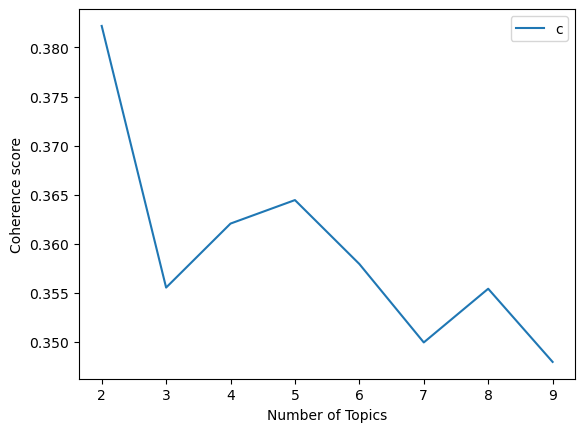

In [28]:


start, stop, step = 2, 10, 1
lsamodel.plot_coherence_graph(
    doc_clean=doc_clean,
    dictionary=dictionary,
    doc_term_matrix=doc_term_matrix,
    start=start,
    stop=stop,
    step=step,
)


In [43]:
num_of_topics = 5
num_of_words = 30
lsamodel.init_model(dictionary, doc_term_matrix, num_of_topics=num_of_topics)

sla_df = pd.DataFrame(lsamodel.return_model_params(num_of_topics, num_of_words))

In [44]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

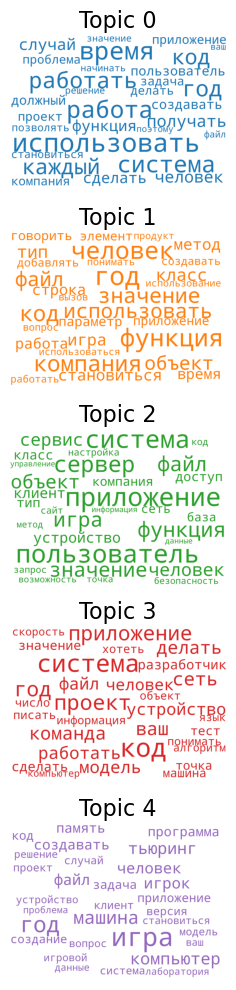

In [45]:
fig, axes = plt.subplots(num_of_topics, 1, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = {i:abs(k) for i,k in zip(sla_df.iloc[i,1], sla_df.iloc[i,0])}
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [47]:
models, coherence_values = lsamodel.compute_coherence_values(dictionary,doc_term_matrix,doc_clean,  start=5, stop=6, step=1, coherence="c_v")

100%|██████████| 1/1 [02:23<00:00, 143.25s/it]


In [48]:
models, coherence_values_umass = lsamodel.compute_coherence_values(dictionary,doc_term_matrix,doc_clean,  start=5, stop=6, step=1, coherence="u_mass")

100%|██████████| 1/1 [01:09<00:00, 69.19s/it]


In [49]:
print("c_v:::", coherence_values[0])
print("u_mass", coherence_values_umass[0])

c_v::: 0.36042949814071823
u_mass -0.8218767824143182


In [50]:
num_of_topics = 7
num_of_words = 30
lsamodel.init_model(dictionary, doc_term_matrix, num_of_topics=num_of_topics)

sla_df = pd.DataFrame(lsamodel.return_model_params(num_of_topics, num_of_words))

In [51]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

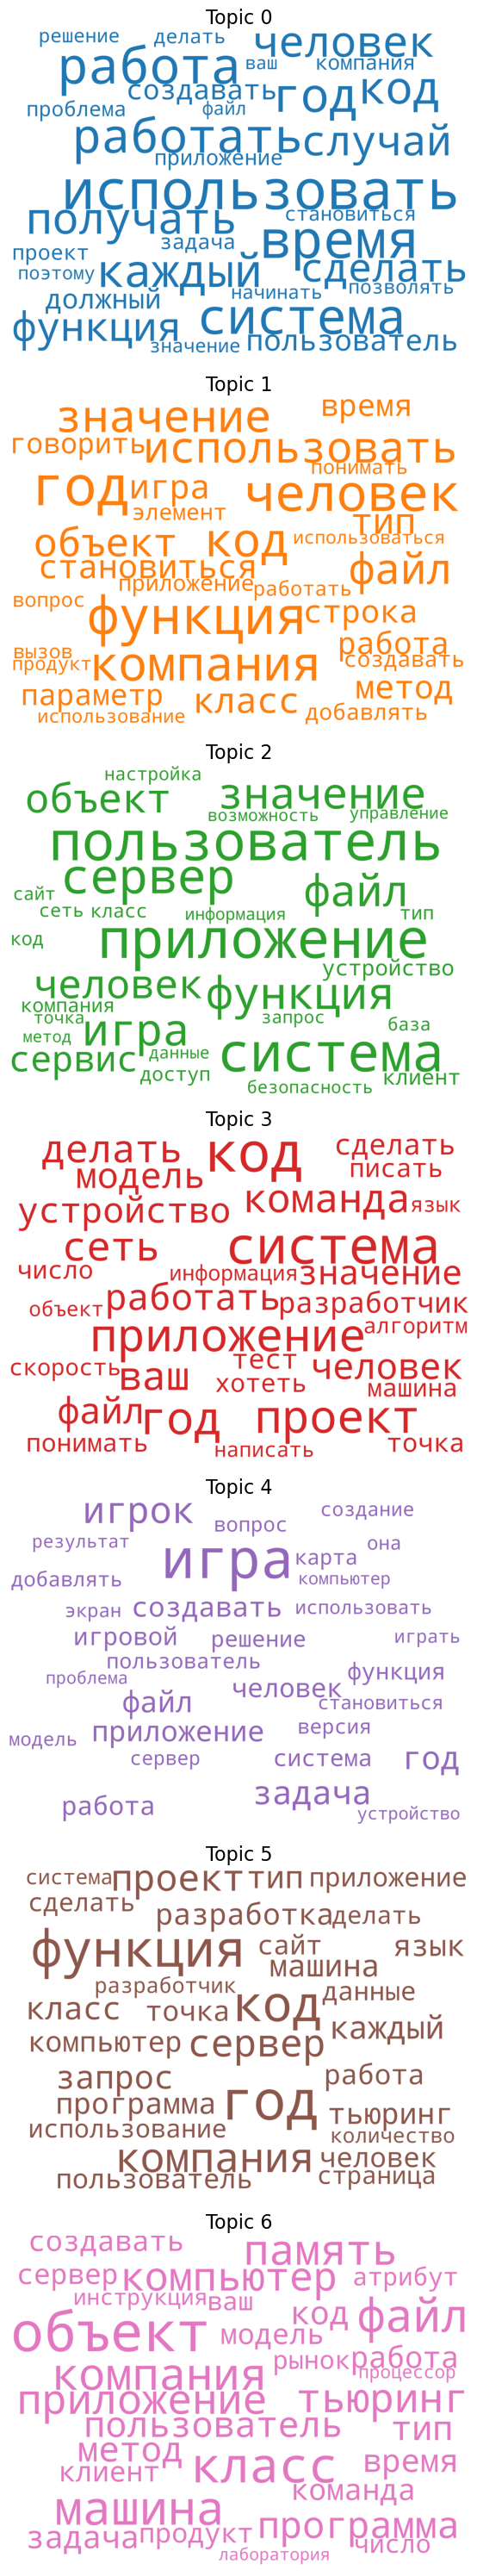

In [52]:
fig, axes = plt.subplots(num_of_topics, 1, figsize=(50,30), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = {i:abs(k) for i,k in zip(sla_df.iloc[i,1], sla_df.iloc[i,0])}
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [53]:
models, coherence_values = lsamodel.compute_coherence_values(dictionary,doc_term_matrix,doc_clean,  start=7, stop=8, step=1, coherence="c_v")
models, coherence_values_umass = lsamodel.compute_coherence_values(dictionary,doc_term_matrix,doc_clean,  start=7, stop=8, step=1, coherence="u_mass")

100%|██████████| 1/1 [01:01<00:00, 61.41s/it]


In [54]:
print("c_v:::", coherence_values[0])
print("u_mass", coherence_values_umass[0])

c_v::: 0.3681800877686106
u_mass -0.9796468346021416
